In [90]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from scipy import stats

import seaborn
seaborn.set()

## Getting Data

In [91]:
collabs = pd.read_csv('collabs.csv')
solos = pd.read_csv('solos.csv')

In [92]:
collabs

,id,name,popularity,artists,release_date,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,3Gf5nttwcX9aaSQXRWidEZ,Ride Wit Me,76,"['Nelly', 'City Spud']",2000-06-27,291781,0.0607,0.850,0.700,0.000002,7.0,0.2440,-6.490,1.0,0.0478,101.875,4.0,0.7240
1,3WkibOpDF7cQ5xntM1epyf,It Wasn't Me,78,"['Shaggy', 'Rik Rok']",2000-08-08,227600,0.0561,0.853,0.606,0.000000,0.0,0.3130,-4.596,1.0,0.0720,94.753,4.0,0.6530
2,3UmaczJpikHgJFyBTAJVoz,Stan,81,"['Eminem', 'Dido']",2000-05-23,404106,0.0371,0.780,0.768,0.000002,6.0,0.5180,-4.325,0.0,0.2380,80.063,4.0,0.5070
3,7FDV5ELOJHCGLe52AnttEd,Angel,75,"['Shaggy', 'Rayvon']",2000-08-08,235133,0.1160,0.740,0.766,0.000000,6.0,0.0406,-2.939,1.0,0.1780,170.531,4.0,0.8070
4,7lgvU7WnwcNZ8dbGUz8yhP,Bitch Please II,73,"['Eminem', 'Dr. Dre', 'Snoop Dogg', 'Xzibit', ...",2000-05-23,288200,0.0783,0.918,0.586,0.000000,1.0,0.1450,-2.890,1.0,0.1330,95.517,4.0,0.7790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,5KTZgG84bKFGm53lhLtTqc,Mwaki,81,"['Zerb', 'Sofiya Nzau']",2023-10-27,208135,0.2010,0.847,0.637,0.201000,7.0,0.1210,-8.751,0.0,0.0587,120.033,4.0,0.0509
5122,4EXwXh99qHAObiMKu9p222,Luck Runs Out,64,"['Jorge Rivera-Herrans', 'Cast of EPIC: The Mu...",2023-12-25,181333,0.7220,0.697,0.637,0.000000,8.0,0.1190,-8.185,1.0,0.0822,135.108,4.0,0.4460
5123,1233MOKLpbc9qjNN31vpl4,At All Costs,64,"['Chris Pine', 'Ariana DeBose', 'Disney']",2023-11-17,198920,0.5420,0.580,0.384,0.000004,7.0,0.0625,-9.747,0.0,0.0301,106.327,3.0,0.2250
5124,17IBDpAl3J39swaoPlfGpp,Another Late Night (feat. Lil Yachty),65,"['Drake', 'Lil Yachty']",2023-10-06,170414,0.0144,0.702,0.710,0.000000,5.0,0.1440,-5.003,0.0,0.0459,158.129,4.0,0.2820


In [93]:
solos

,id,name,popularity,artists,release_date,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,3AJwUDP919kvQ9QcozQPxg,Yellow,89,['Coldplay'],2000-07-10,266773,0.00239,0.429,0.661,0.000121,11.0,0.2340,-7.227,1.0,0.0281,173.372,4.0,0.2850
1,60a0Rd6pjrkxjPbaKzXjfq,In the End,87,['Linkin Park'],2000,216880,0.00958,0.556,0.864,0.000000,3.0,0.2090,-5.870,0.0,0.0584,105.143,4.0,0.4000
2,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,86,['Eminem'],2000-05-23,284200,0.03020,0.949,0.661,0.000000,5.0,0.0454,-4.244,0.0,0.0572,104.504,4.0,0.7600
3,0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,83,['Outkast'],2000-10-31,270506,0.14300,0.843,0.806,0.000000,4.0,0.0771,-5.946,0.0,0.2690,94.948,4.0,0.6130
4,7D0RhFcb3CrfPuTJ0obrod,Sparks,84,['Coldplay'],2000-07-10,227093,0.74800,0.371,0.268,0.051700,1.0,0.1040,-10.506,1.0,0.0281,102.617,3.0,0.1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18869,0GdZqKPBrvkpo7mk2OyHtf,Back Then Right Now,63,['Tyler Hubbard'],2023-09-08,201485,0.01640,0.659,0.865,0.000000,7.0,0.1340,-4.416,1.0,0.0541,126.998,4.0,0.7610
18870,2y42aEs7Rczw5eMLK9UMeW,I Should Have Stayed at Home,68,['Ryan Mack'],2023-04-07,163013,0.12600,0.849,0.527,0.000000,5.0,0.0787,-5.966,0.0,0.0761,98.004,4.0,0.7110
18871,23uUytja1B1mUOOIoygf6u,Angels in Tibet,71,['Amaarae'],2023-06-09,142613,0.28200,0.798,0.664,0.294000,5.0,0.1350,-6.043,0.0,0.1020,140.038,4.0,0.5550
18872,40gtc8CqWgi9KXY6tbxI8z,Pink Noise to Help Focus,66,['Xella Machina'],2023-03-05,202750,0.80200,0.206,0.203,0.999000,1.0,0.1120,-36.132,1.0,0.0990,62.138,4.0,0.0749


## Cleaning Data

### 1. Remove duplicate tracks

In [94]:
solos[solos['id'].duplicated()]

,id,name,popularity,artists,release_date,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9636,0S0O5SDpY3DSAz4cLED6Ay,Olvídame,63,['Julión Álvarez y su Norteño Banda'],2011-11-15,243133,0.6,0.761,0.402,0.000004,3.0,0.0602,-5.85,1.0,0.0331,129.975,3.0,0.961


In [95]:
solos = solos[~solos['id'].duplicated()]

### 2. Convert artists string into lists

In [96]:
collabs['artists'] = collabs['artists'].apply(ast.literal_eval)
solos['artists'] = solos['artists'].apply(ast.literal_eval)

/var/folders/rq/yqv8w37x75z2zw1y91xy112c0000gn/T/ipykernel_70355/2325887037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solos['artists'] = solos['artists'].apply(ast.literal_eval)


### 3. Remove unused features

In [97]:
unused_features = ['duration', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness',
    'tempo', 'time_signature', 'valence']

collabs = collabs.drop(columns=unused_features)
solos = solos.drop(columns=unused_features)

### 4. Balance data

In [98]:
solos_balanced = solos.sample(n=collabs.shape[0], random_state=3)
solos_balanced

,id,name,popularity,artists,release_date
18517,045ZeOHPIzhxxsm8bq5kyE,Out Of The Woods (Taylor's Version),73,[Taylor Swift],2023-10-26
7769,5UmLoBLWWRnqGhPfVWRgGd,Seventeen,62,[MARINA],2009-07-15
1951,2H3kc8vwKWtgaDWs0Xw98Y,Eres Mi Religión - 2020 Remasterizado,66,[Maná],2002
16795,3JHQY6VnwmUMuYb0XI2O7Y,Pray For You,58,[Jhené Aiko],2020-03-06
8824,6kblAEj0T0312fv5QWsXzo,Congratulations,57,[MGMT],2010-04-09
...,...,...,...,...,...
18219,7K3BhSpAxZBznislvUMVtn,Last Night,84,[Morgan Wallen],2023-03-03
18525,0MZGwYb5mTATbmoi671wEg,Leave Her,68,[LUCKI],2023-04-27
13453,1cncTuPOwiP1jlPH9U7qkH,The Wheels on the Bus,64,[Nursery Rhymes Band],2016-08-28
7679,4B4vB3oB8csotplfoQcAd6,Little Lion Man,69,[Mumford & Sons],2009-10-02


### 5. Convert dates into year

#### a) Separate tracks with actual dates and tracks with just the year

In [99]:
solos_dates = solos_balanced[solos_balanced['release_date'].apply(len) > 4]
solos_years = solos_balanced[solos_balanced['release_date'].apply(len) == 4]

collabs_dates = collabs[collabs['release_date'].apply(len) > 4]
collabs_years = collabs[collabs['release_date'].apply(len) == 4]

solos_dates['release_date'] = pd.to_datetime(solos_dates['release_date'])
collabs_dates['release_date'] = pd.to_datetime(collabs_dates['release_date'])

/var/folders/rq/yqv8w37x75z2zw1y91xy112c0000gn/T/ipykernel_70355/1842413751.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solos_dates['release_date'] = pd.to_datetime(solos_dates['release_date'])
/var/folders/rq/yqv8w37x75z2zw1y91xy112c0000gn/T/ipykernel_70355/1842413751.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collabs_dates['release_date'] = pd.to_datetime(collabs_dates['release_date'])


#### b) Convert dates into years

In [100]:
solos_dates_parsed = solos_dates.copy()
solos_dates_parsed['year'] = solos_dates_parsed['release_date'].dt.year
solos_dates_parsed = solos_dates_parsed.drop(columns=['release_date'])

collabs_dates_parsed = collabs_dates.copy()
collabs_dates_parsed['year'] = collabs_dates_parsed['release_date'].dt.year
collabs_dates_parsed = collabs_dates_parsed.drop(columns=['release_date'])

In [101]:
solos_dates_parsed

,id,name,popularity,artists,year
18517,045ZeOHPIzhxxsm8bq5kyE,Out Of The Woods (Taylor's Version),73,[Taylor Swift],2023
7769,5UmLoBLWWRnqGhPfVWRgGd,Seventeen,62,[MARINA],2009
16795,3JHQY6VnwmUMuYb0XI2O7Y,Pray For You,58,[Jhené Aiko],2020
8824,6kblAEj0T0312fv5QWsXzo,Congratulations,57,[MGMT],2010
7104,1ZqHjApl3pfzwjweTfMi0g,Violet Hill,65,[Coldplay],2008
...,...,...,...,...,...
18219,7K3BhSpAxZBznislvUMVtn,Last Night,84,[Morgan Wallen],2023
18525,0MZGwYb5mTATbmoi671wEg,Leave Her,68,[LUCKI],2023
13453,1cncTuPOwiP1jlPH9U7qkH,The Wheels on the Bus,64,[Nursery Rhymes Band],2016
7679,4B4vB3oB8csotplfoQcAd6,Little Lion Man,69,[Mumford & Sons],2009


In [102]:
collabs_dates_parsed

,id,name,popularity,artists,year
0,3Gf5nttwcX9aaSQXRWidEZ,Ride Wit Me,76,"[Nelly, City Spud]",2000
1,3WkibOpDF7cQ5xntM1epyf,It Wasn't Me,78,"[Shaggy, Rik Rok]",2000
2,3UmaczJpikHgJFyBTAJVoz,Stan,81,"[Eminem, Dido]",2000
3,7FDV5ELOJHCGLe52AnttEd,Angel,75,"[Shaggy, Rayvon]",2000
4,7lgvU7WnwcNZ8dbGUz8yhP,Bitch Please II,73,"[Eminem, Dr. Dre, Snoop Dogg, Xzibit, Nate Dogg]",2000
...,...,...,...,...,...
5121,5KTZgG84bKFGm53lhLtTqc,Mwaki,81,"[Zerb, Sofiya Nzau]",2023
5122,4EXwXh99qHAObiMKu9p222,Luck Runs Out,64,"[Jorge Rivera-Herrans, Cast of EPIC: The Music...",2023
5123,1233MOKLpbc9qjNN31vpl4,At All Costs,64,"[Chris Pine, Ariana DeBose, Disney]",2023
5124,17IBDpAl3J39swaoPlfGpp,Another Late Night (feat. Lil Yachty),65,"[Drake, Lil Yachty]",2023


#### c) Join back newly converted years with the data with just the years  

In [103]:
solos_years = solos_years.rename(columns={'release_date': 'year'})
solos_joined = pd.concat([solos_years, solos_dates_parsed])

collabs_years = collabs_years.rename(columns={'release_date': 'year'})
collabs_joined = pd.concat([collabs_years, collabs_dates_parsed])

In [104]:
solos_joined

,id,name,popularity,artists,year
1951,2H3kc8vwKWtgaDWs0Xw98Y,Eres Mi Religión - 2020 Remasterizado,66,[Maná],2002
8685,7LrZ3SczM7zlUkVlhevPp2,A Little More Country Than That,58,[Easton Corbin],2010
2550,7zuwr7YqqpveNtxlKe1vn6,Y Tú Te Vas,59,[Chayanne],2002
3800,6ZixnWzzH1YxqBg9kLOPDy,Sideways,52,[Citizen Cope],2004
6097,0yrvmIafnxkkMCMAIaDgiQ,Te Quiero,57,[Flex],2007
...,...,...,...,...,...
18219,7K3BhSpAxZBznislvUMVtn,Last Night,84,[Morgan Wallen],2023
18525,0MZGwYb5mTATbmoi671wEg,Leave Her,68,[LUCKI],2023
13453,1cncTuPOwiP1jlPH9U7qkH,The Wheels on the Bus,64,[Nursery Rhymes Band],2016
7679,4B4vB3oB8csotplfoQcAd6,Little Lion Man,69,[Mumford & Sons],2009


In [105]:
collabs_joined

,id,name,popularity,artists,year
29,0YHI5hydPPth6J5UOzdLDX,Lay Low,58,"[Snoop Dogg, Master P, Nate Dogg, Butch Cassid...",2000
40,2MNQMtZbOb7rBWli3TSok0,Bad Boyz (feat. Barrington Levy),51,"[Shyne, Barrington Levy]",2000
54,0uMn8WKu3qtQLaUyal1bsz,Mastermind,49,"[Deltron 3030, Del The Funky Homosapien, Dan T...",2000
55,1ZxwWrMNukjS8sb9TZ0HjU,God in Me (feat. Kierra Sheard),46,"[Mary Mary, Kierra Sheard]",2000
61,62Da3JOu9H9EIgmqV7DoLG,Lux Aeterna,55,"[Clint Mansell, Kronos Quartet]",2000
...,...,...,...,...,...
5121,5KTZgG84bKFGm53lhLtTqc,Mwaki,81,"[Zerb, Sofiya Nzau]",2023
5122,4EXwXh99qHAObiMKu9p222,Luck Runs Out,64,"[Jorge Rivera-Herrans, Cast of EPIC: The Music...",2023
5123,1233MOKLpbc9qjNN31vpl4,At All Costs,64,"[Chris Pine, Ariana DeBose, Disney]",2023
5124,17IBDpAl3J39swaoPlfGpp,Another Late Night (feat. Lil Yachty),65,"[Drake, Lil Yachty]",2023


## Are collaborations more/less popular than solo tracks?

### 1. Ensure T-test assumptions are satisfied

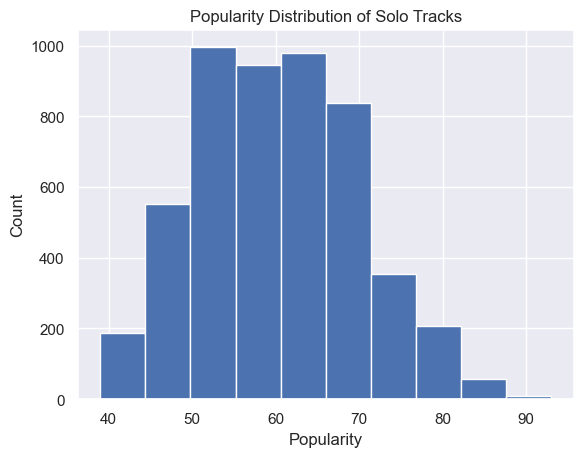

In [106]:
plt.hist(solos_joined['popularity'])
plt.title('Popularity Distribution of Solo Tracks')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

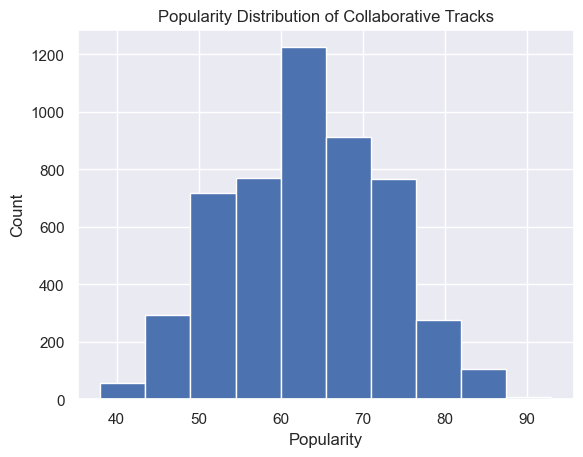

In [107]:
plt.hist(collabs_joined['popularity'])
plt.title('Popularity Distribution of Collaborative Tracks')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

#### a) Ensure data is normal or close enough to normal

In [108]:
solos_p = stats.normaltest(solos_joined['popularity']).pvalue
collabs_p = stats.normaltest(collabs_joined['popularity']).pvalue

print(f'Normality test p-value for solos: {solos_p}')
print(f'Normality test p-value for collabs: {collabs_p}')

Normality test p-value for solos: 6.277639392370755e-24
Normality test p-value for collabs: 6.803993191545313e-22


##### Since p < 0.05 for both groups of data, they fail the normality test. However, judging by the plot, it seems normal enough since n >= 40

#### b) Ensure both sets have equal variance or close enough to it

In [109]:
levene_p = stats.levene(solos_joined['popularity'], collabs_joined['popularity']).pvalue

print(f'Equal variance test p-value: {levene_p}')

Equal variance test p-value: 0.41297817790703406


##### Since p > 0.05, both groups of data have equal variance

### 2. Do the T-test

In [110]:
popularity_t_test = stats.ttest_ind(solos_joined['popularity'], collabs_joined['popularity'])
print(f'T-test p-value: {popularity_t_test.pvalue}')

T-test p-value: 9.315074937166965e-49


##### We found significance with p < 0.05, and thus we conclude that the popularity of collaborations are different than that of solo tracks

### 3. Compare the means of the groups

In [111]:
collabs_popularity_mean = collabs_joined['popularity'].mean()
solos_popularity_mean = solos_joined['popularity'].mean()

print(f'Mean of collaborative track popularity: {collabs_popularity_mean}')
print(f'Mean of solo track popularity: {solos_popularity_mean}')

Mean of collaborative track popularity: 62.92996488490051
Mean of solo track popularity: 60.16426063207179


#### The popularity of collaborative tracks is slightly higher than that of solo tracks on average.

## How have the number of collaborations changed from the year 2000 to 2023?

### 1. Convert years to integers for plotting

In [112]:
collabs_joined['year'] = collabs_joined['year'].astype(np.int64)
collabs_joined['year'].dtype

dtype('int64')

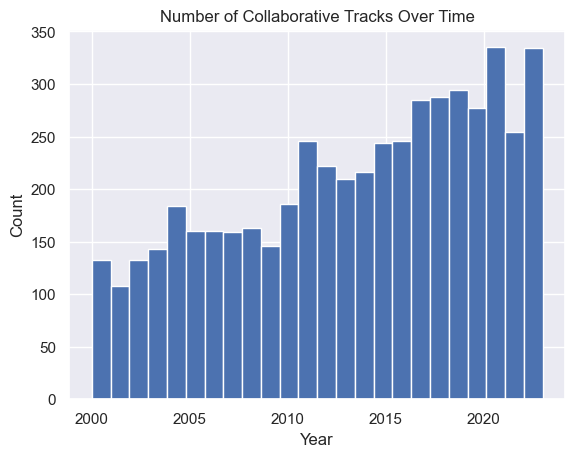

In [113]:
plt.hist(collabs_joined['year'], bins=24)
plt.title('Number of Collaborative Tracks Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### It seems like a steady increase. Let's see...

### 2. Gets counts of collaborative tracks per year

In [114]:
counts_per_year = collabs_joined.drop(columns=['name', 'popularity', 'artists'])
counts_per_year = counts_per_year.groupby('year').count()
counts_per_year = counts_per_year.rename(columns={'id': 'collab_count'}).reset_index()
counts_per_year

,year,collab_count
0,2000,133
1,2001,108
2,2002,133
3,2003,143
4,2004,184
5,2005,160
6,2006,160
7,2007,159
8,2008,163
9,2009,146


### 3. Fit a regression line through the data

In [115]:
counts_fit = stats.linregress(counts_per_year['year'], counts_per_year['collab_count'])
counts_per_year['prediction'] = counts_per_year['year'] * counts_fit.slope + counts_fit.intercept
counts_per_year

,year,collab_count,prediction
0,2000,133,112.373333
1,2001,108,121.174203
2,2002,133,129.975072
3,2003,143,138.775942
4,2004,184,147.576812
5,2005,160,156.377681
6,2006,160,165.178551
7,2007,159,173.979420
8,2008,163,182.780290
9,2009,146,191.581159


In [116]:
counts_fit.slope, counts_fit.intercept

(np.float64(8.800869565217392), np.float64(-17489.36579710145))

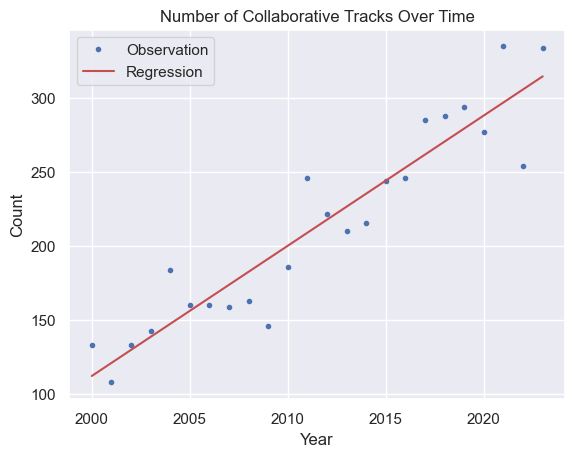

In [117]:
plt.plot(counts_per_year['year'], counts_per_year['collab_count'], 'b.')
plt.plot(counts_per_year['year'], counts_per_year['prediction'], 'r')
plt.title('Number of Collaborative Tracks Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Observation', 'Regression'])
plt.show()

### 4. Plot the residuals

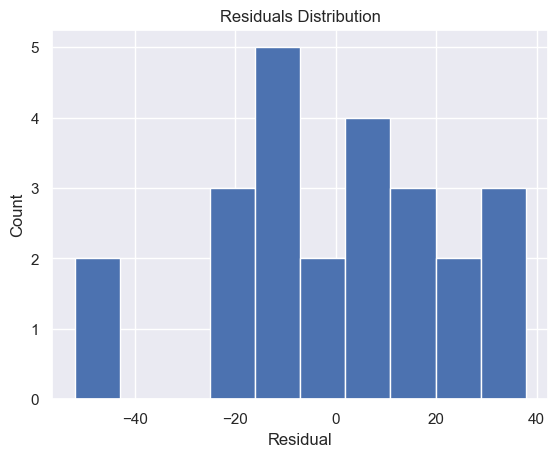

In [118]:
counts_per_year['residual'] = counts_per_year['collab_count'] - counts_per_year['prediction']
plt.hist(counts_per_year['residual'])
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [119]:
count_residuals_normality_p = stats.normaltest(counts_per_year['residual']).pvalue
print(f'Normality test p-value for the count residuals: {count_residuals_normality_p}')

Normality test p-value for the count residuals: 0.7902083927841548


#### The residuals pass the normality test since p > 0.05

In [120]:
counts_fit.pvalue

np.float64(1.959741721444091e-11)

#### The Ordinary Least Squares test gives us p < 0.05, and we can conclude that the slope of the regression line is non-zero. Looking at the plot, we see that the slope is positive. Thus, we can say that the number of collaborations has increased over the years.